In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2.shape

(13320, 5)

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\dell\AppData\Local\Temp\ipykernel_8204\2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [17]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [18]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [20]:
df5.to_csv("bhp.csv",index=False)

In [21]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [22]:
location_stats.values.sum()

13200

In [23]:
len(location_stats[location_stats>10])

240

In [24]:
len(location_stats)

1287

In [25]:
len(location_stats[location_stats<=10])

1047

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [27]:
len(df5.location.unique())

1287

In [28]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [29]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
df5.shape

(13200, 7)

In [31]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [32]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

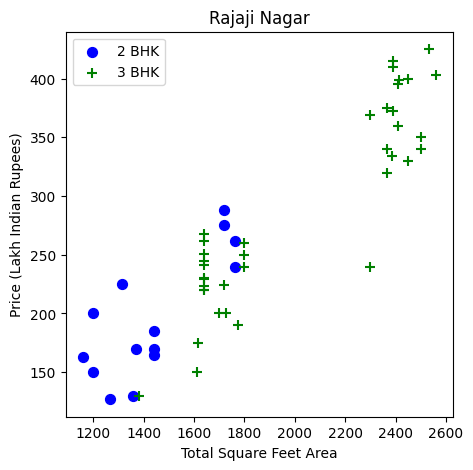

In [34]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (5,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

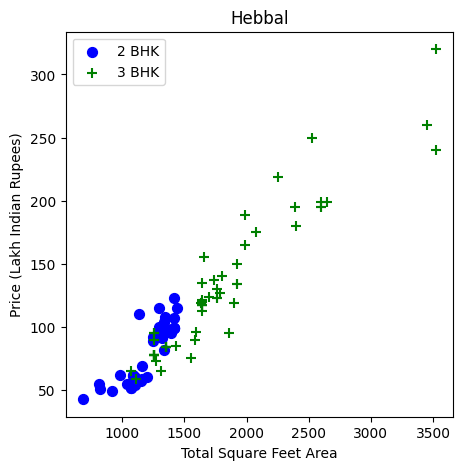

In [35]:
plot_scatter_chart(df7,"Hebbal")

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

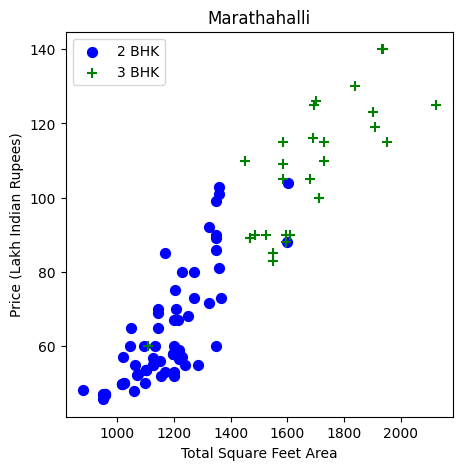

In [37]:
plot_scatter_chart(df8,"Marathahalli")

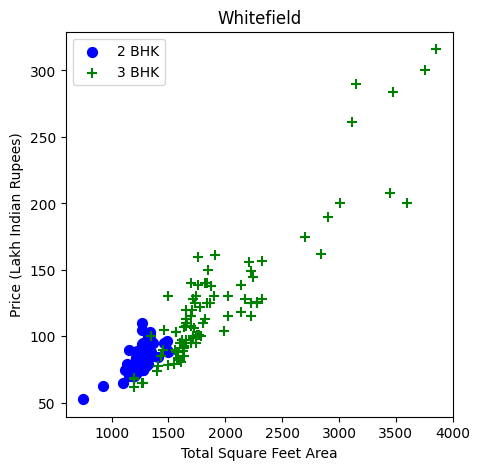

In [38]:
plot_scatter_chart(df8,"Whitefield")

Text(0, 0.5, 'Count')

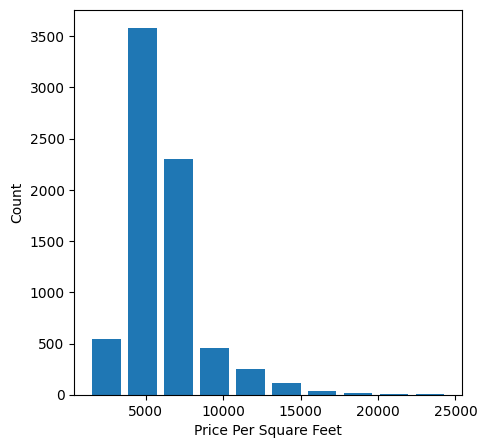

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (5,5)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [40]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

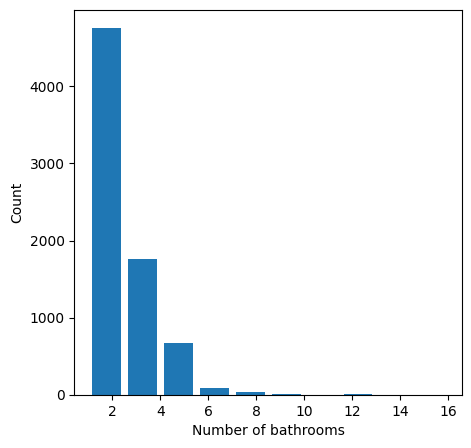

In [41]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [42]:
df8.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13], dtype=int64)

Text(0, 0.5, 'Count')

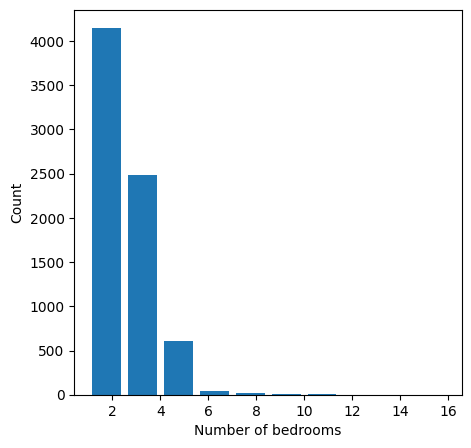

In [43]:
plt.hist(df8.bhk,rwidth=0.8)
plt.xlabel("Number of bedrooms")
plt.ylabel("Count")

In [44]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [45]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [46]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [47]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [48]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [49]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df12.shape

(7239, 244)

In [53]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
X.shape

(7239, 243)

In [55]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [56]:
len(y)

7239

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229449

In [59]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
print(lasso_reg.score(X_test, y_test))


0.7826393164767916


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
print(rf_reg.score(X_test, y_test))


0.7739237922684291


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
gb_reg.fit(X_train, y_train)
print(gb_reg.score(X_test, y_test))


0.7656591160625721


In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(LinearRegression(), X, y, cv=cv)
print(scores.mean())

0.8477957812447828


In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
lasso_reg = Lasso(alpha=0.1)
scores = cross_val_score(lasso_reg, X, y, cv=cv)
print(scores.mean())


0.799799875645299


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
scores = cross_val_score(rf_reg, X, y, cv=cv)
print(scores.mean())


0.7854348369938314


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
scores = cross_val_score(gb_reg, X, y, cv=cv)
print(scores.mean())


0.7272041773772809


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
               'fit_intercept' : [True, False],
               'copy_X' : [True, False],
               'n_jobs' : [1,2,3]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'max_depth': [None, 5, 10, 15]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [10, 50, 100],
                'learning_rate': [0.1, 0.05, 0.01]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        model = gs.best_estimator_
        accuracy = model.score(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,    
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



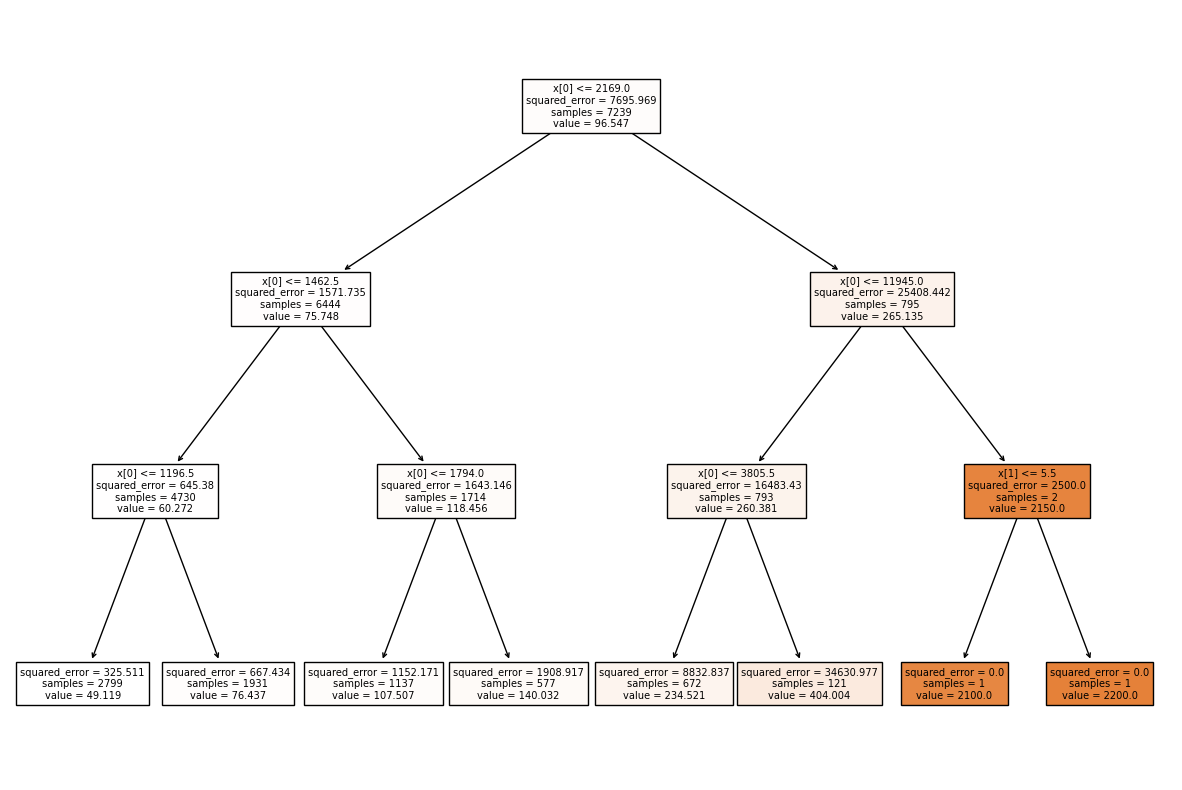

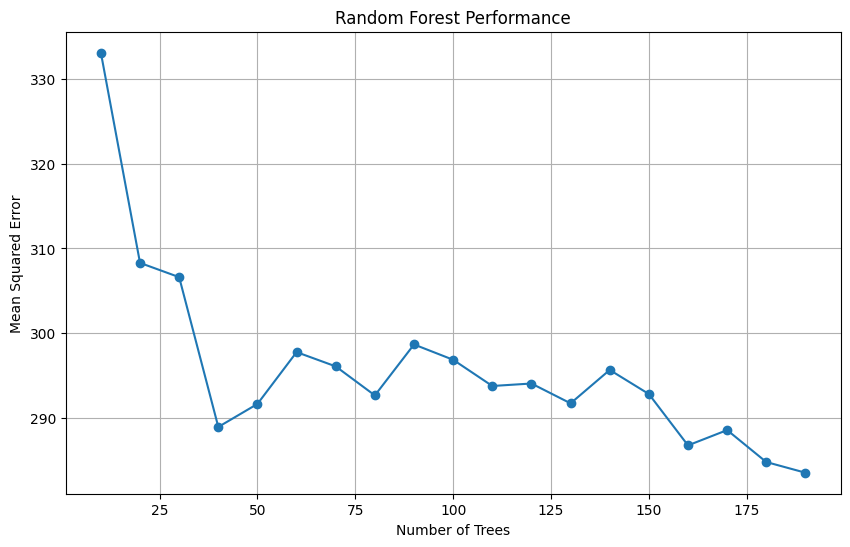

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Assuming X and y are your features and target variables
# Fit the decision tree model
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(15,10))
plot_tree(tree_model, filled=True)
plt.show()
# Define a range of estimators to test
estimators = np.arange(10, 200, 10)

# Initialize a list to hold the MSE for each number of estimators
mse_scores = []

# Loop through the range of estimators
for n_estimators in estimators:
    # Fit the Random Forest model with the current number of estimators
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X, y)
    
    # Predict the target variable
    y_pred = rf_model.predict(X)
    
    # Calculate the MSE
    mse = mean_squared_error(y, y_pred)
    
    # Append the MSE to the list
    mse_scores.append(mse)

# Plot the MSE scores
plt.figure(figsize=(10, 6))
plt.plot(estimators, mse_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Performance')
plt.grid(True)
plt.show()


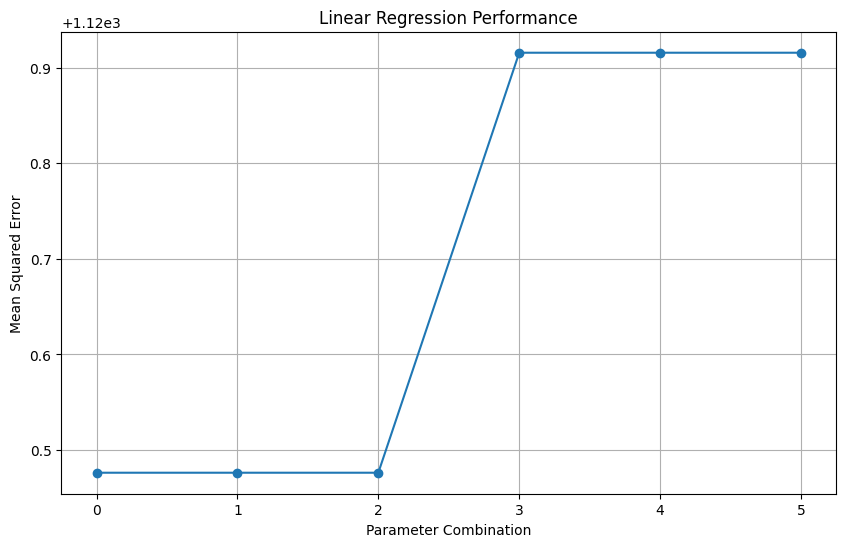

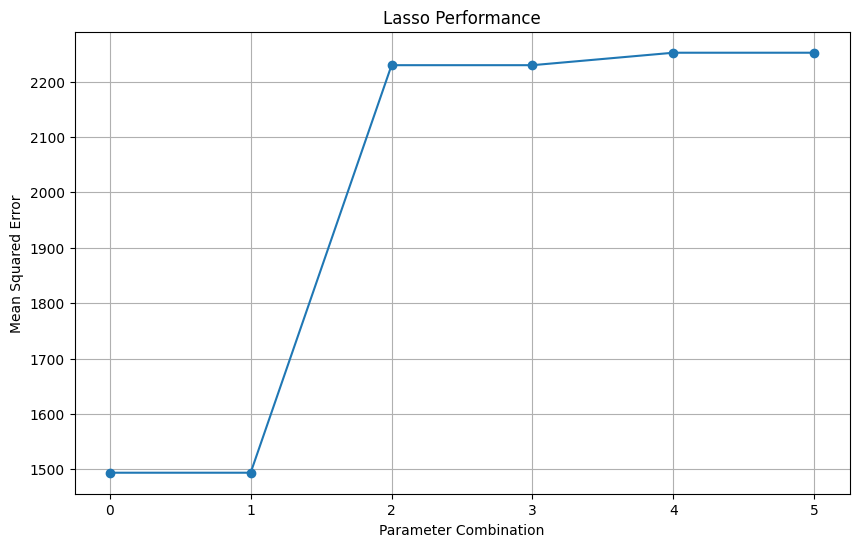

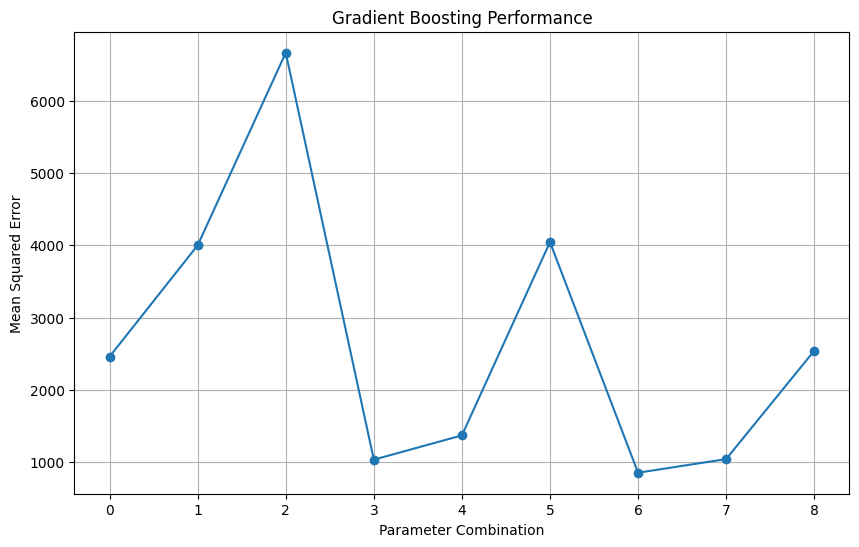

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Define a range of parameters to test for Linear Regression
fit_intercepts = [True, False]
n_jobs = [1, 2, 3]

# Initialize lists to hold the MSE for each combination of parameters
mse_scores_lr = []

# Loop through the range of parameters
for fit_intercept in fit_intercepts:
    for n_job in n_jobs:
        # Fit the Linear Regression model with the current parameters
        lr_model = LinearRegression(fit_intercept=fit_intercept, n_jobs=n_job)
        lr_model.fit(X, y)
        
        # Predict the target variable
        y_pred = lr_model.predict(X)
        
        # Calculate the MSE
        mse = mean_squared_error(y, y_pred)
        
        # Append the MSE to the list
        mse_scores_lr.append(mse)

# Plot the MSE scores for Linear Regression
plt.figure(figsize=(10, 6))
plt.plot(mse_scores_lr, marker='o')
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Squared Error')
plt.title('Linear Regression Performance')
plt.grid(True)
plt.show()
# Define a range of parameters to test for Lasso
alphas = [0.1, 1, 10]
selections = ['random', 'cyclic']

# Initialize lists to hold the MSE for each combination of parameters
mse_scores_lasso = []

# Loop through the range of parameters
for alpha in alphas:
    for selection in selections:
        # Fit the Lasso model with the current parameters
        lasso_model = Lasso(alpha=alpha, selection=selection)
        lasso_model.fit(X, y)
        
        # Predict the target variable
        y_pred = lasso_model.predict(X)
        
        # Calculate the MSE
        mse = mean_squared_error(y, y_pred)
        
        # Append the MSE to the list
        mse_scores_lasso.append(mse)

# Plot the MSE scores for Lasso
plt.figure(figsize=(10, 6))
plt.plot(mse_scores_lasso, marker='o')
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Performance')
plt.grid(True)
plt.show()
# Define a range of parameters to test for Gradient Boosting
n_estimators = [10, 50, 100]
learning_rates = [0.1, 0.05, 0.01]

# Initialize lists to hold the MSE for each combination of parameters
mse_scores_gb = []

# Loop through the range of parameters
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        # Fit the Gradient Boosting model with the current parameters
        gb_model = GradientBoostingRegressor(n_estimators=n_estimator, learning_rate=learning_rate)
        gb_model.fit(X, y)
        
        # Predict the target variable
        y_pred = gb_model.predict(X)
        
        # Calculate the MSE
        mse = mean_squared_error(y, y_pred)
        
        # Append the MSE to the list
        mse_scores_gb.append(mse)

# Plot the MSE scores for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.plot(mse_scores_gb, marker='o')
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Performance')
plt.grid(True)
plt.show()


In [71]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.847951,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.799800,"{'alpha': 0.1, 'selection': 'cyclic'}"
2,random_forest,0.786591,"{'max_depth': None, 'n_estimators': 100}"
3,gradient_boosting,0.762523,"{'learning_rate': 0.1, 'n_estimators': 100}"


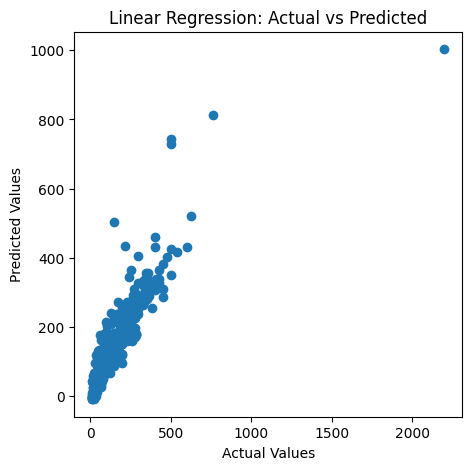

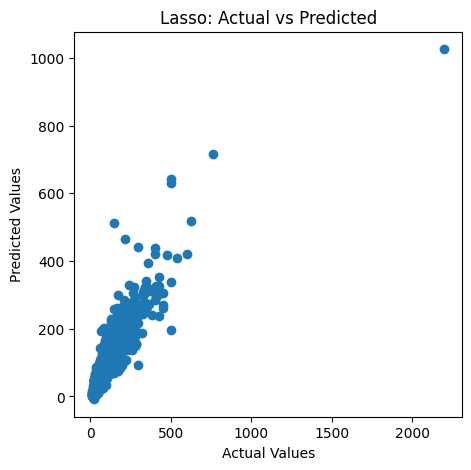

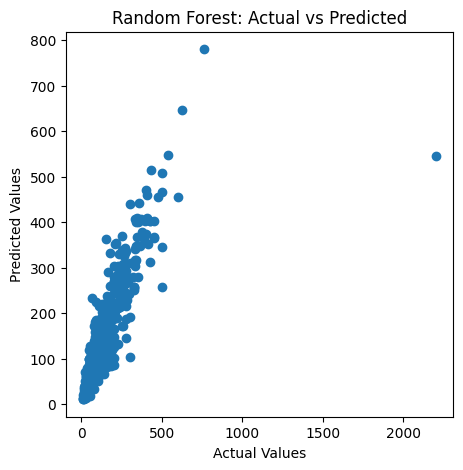

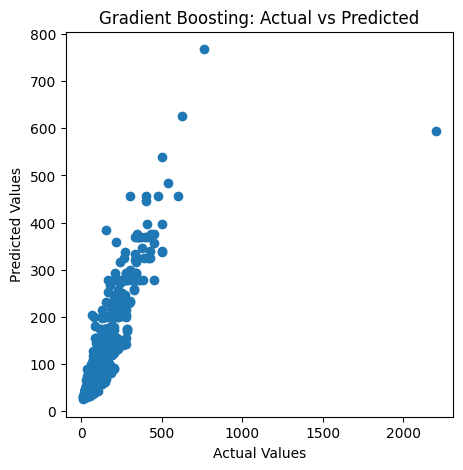

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()
lasso_model = Lasso(alpha=0.1) # Example alpha value
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso: Actual vs Predicted')
plt.show()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

plt.scatter(y_test, y_pred_gb)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()


In [73]:
#(import matplotlib.pyplot as plt
    #result = find_best_model_using_gridsearchcv(X, y)
    #plt.figure(figsize=(12,6))
    #plt.barh(result['model'], result['best_score'], color='skyblue')
    #plt.xlabel('Best Score')
    #plt.ylabel('Model')
    #plt.title('Best Score for Each Model')
    #plt.show())#

In [75]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import math
result=find_best_model_using_gridsearchcv(X,y)
for idx, row in result.iterrows():
    model_name = row['model']
    best_params = row['best_params']
    if model_name == 'linear_regression':
        model = LinearRegression(**best_params)
    elif model_name == 'lasso':
        model = Lasso(**best_params)
    elif model_name == 'random_forest':
        model = RandomForestRegressor(**best_params)
    elif model_name == 'gradient_boosting':
        model = GradientBoostingRegressor(**best_params)
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    rmse = math.sqrt(mean_squared_error(y, y_pred))
    print(f"Model: {model_name}")
    print(f"Best Parameters: {best_params}")
    print(f"R-squared: {r2}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape * 100}%")
    print("\n")


Model: linear_regression
Best Parameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1}
R-squared: 0.8543503020740678
RMSE: 33.48007793653373
MAPE: 20.066568375078177%


Model: lasso
Best Parameters: {'alpha': 0.1, 'selection': 'cyclic'}
R-squared: 0.8058787487248856
RMSE: 38.65166503625748
MAPE: 23.96902611413215%


Model: random_forest
Best Parameters: {'max_depth': 15, 'n_estimators': 50}
R-squared: 0.9233690515084554
RMSE: 24.284757252869053
MAPE: 17.248718906356572%


Model: gradient_boosting
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
R-squared: 0.8891803558508429
RMSE: 29.20384547458093
MAPE: 22.050917470912793%




In [ ]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.86570258311355

In [ ]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.0806228498612

In [ ]:
predict_price('Indira Nagar',1000, 2, 2)

193.3119773317959

In [ ]:
predict_price('Indira Nagar',1000, 3, 3)


195.5268975985436

In [ ]:
predict_price('1st Block Jayanagar',1100, 2, 2)

210.3956527995769

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))